<a href="https://colab.research.google.com/github/jmohsbeck1/jpmc_mle/blob/labs/JPMC_Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [325]:
# John Mohsbeck
# Day 4 Lab
# Outliers
# Feature Selection
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load a dataset from openML
# Dataset: IBM attrition dataset
# Based on features, try to predeict if employee stays or leaves
import ssl 
ssl._create_default_https_context = ssl._create_unverified_context
import certifi
from sklearn.datasets import fetch_openml 
# Download the dataset from openml
dataset = fetch_openml(data_id=43696, as_frame=True)
#Extract feature matrix X and show 5 random samples
df = dataset["frame"]
pd.set_option("display.max_columns", None)
df.sample(5)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
242,41,No,Travel_Rarely,1411,Research Development,19,2,Life Sciences,1,334,3,Male,36,3,2,Research Scientist,1,Divorced,3072,19877,2,Y,No,16,3,1,80,2,17,2,2,1,0,0,0
749,52,Yes,Travel_Rarely,266,Sales,2,1,Marketing,1,1038,1,Female,57,1,5,Manager,4,Married,19845,25846,1,Y,No,15,3,4,80,1,33,3,3,32,14,6,9
726,31,No,Travel_Frequently,853,Research Development,1,1,Life Sciences,1,1011,3,Female,96,3,2,Manufacturing Director,1,Married,4148,11275,1,Y,No,12,3,3,80,1,4,1,3,4,3,0,3
1257,31,Yes,Travel_Rarely,1079,Sales,16,4,Marketing,1,1761,1,Male,70,3,3,Sales Executive,3,Married,8161,19002,2,Y,No,13,3,1,80,3,10,2,3,1,0,0,0
792,33,Yes,Travel_Frequently,827,Research Development,29,4,Medical,1,1101,1,Female,54,2,2,Research Scientist,3,Single,4508,3129,1,Y,No,22,4,2,80,0,14,4,3,13,7,3,8


In [326]:
# Basic Data Cleaning
# Make columns lower case
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C

In [327]:
df.head(1)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,yes,travel_rarely,1102,sales,1,2,life_sciences,1,1,2,female,94,3,2,sales_executive,4,single,5993,19479,8,y,yes,11,3,1,80,0,8,0,1,6,4,0,5


# Tukey Method

In [190]:
df = df.dropna()

In [191]:
df['monthlyincome']

0       5993
1       5130
2       2090
3       2909
4       3468
        ... 
1465    2571
1466    9991
1467    6142
1468    5390
1469    4404
Name: monthlyincome, Length: 1470, dtype: int64

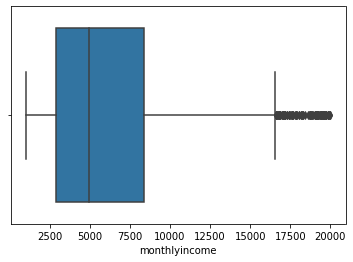

In [192]:
# MonthlyIncome has outliers
# Will Use Tukey method
sns.boxplot(x=df['monthlyincome'])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


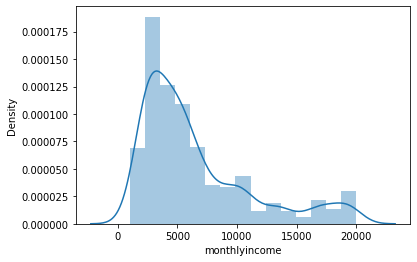

In [193]:
sns.distplot(df['monthlyincome'],bins=15,kde=True)
plt.show()

In [194]:
df[['monthlyincome']].describe()

,monthlyincome
count,1470.000000
mean,6502.931293
std,4707.956783
min,1009.000000
25%,2911.000000
50%,4919.000000
75%,8379.000000
max,19999.000000


In [195]:
Q1 = df['monthlyincome'].quantile(0.25)
Q1

2911.0

In [196]:
Q3 = df['monthlyincome'].quantile(0.75)
Q3

8379.0

In [197]:
IQR = Q3 - Q1
IQR

5468.0

In [198]:
# Using -0.15 for lower_lim
lower_lim = Q1 - 0.15 * IQR
lower_lim

2090.8

In [199]:
# Using +0.15 for upper_lim
upper_lim = Q3 + 0.15 * IQR
upper_lim

9199.2

In [200]:
# Dropping Outliers
outlier_15_low = (df['monthlyincome'] < lower_lim)
outlier_15_up = (df['monthlyincome'] > upper_lim)

In [201]:
sum(outlier_15_up)

330

In [202]:
sum(outlier_15_low)

70

In [203]:
len(df['monthlyincome'])

1470

In [204]:
n_outliers = sum(outlier_15_up) + sum(outlier_15_low)
n_outliers

400

In [205]:
n_total = len(df['monthlyincome'])
print("Total: " + str(n_total))
n_outliers = len(df['monthlyincome'][outlier_15_low]) + len(df['monthlyincome'][outlier_15_up])
print("Outlier Count: " + str(n_outliers))
n_valid = n_total - n_outliers
print("Total Feature Count After Outliers Removed: " + str(n_valid))

Total: 1470
Outlier Count: 400
Total Feature Count After Outliers Removed: 1070


In [206]:
df['monthlyincome'][(outlier_15_low | outlier_15_up)]  # example records that are outliers

2        2090
8        9526
14       2028
15       9980
18      15427
        ...  
1457     2001
1461    10854
1462    12031
1463     9936
1466     9991
Name: monthlyincome, Length: 400, dtype: int64

In [207]:
df['monthlyincome'][~(outlier_15_low | outlier_15_up)]  # all of the records that are NOT outliers

0       5993
1       5130
3       2909
4       3468
5       3068
        ... 
1464    2966
1465    2571
1467    6142
1468    5390
1469    4404
Name: monthlyincome, Length: 1070, dtype: int64

In [208]:
df = df[~(outlier_15_low | outlier_15_up)] 
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,yes,travel_rarely,1102,sales,1,2,life_sciences,1,1,2,female,94,3,2,sales_executive,4,single,5993,19479,8,y,yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,no,travel_frequently,279,research__development,8,1,life_sciences,1,2,3,male,61,2,2,research_scientist,2,married,5130,24907,1,y,no,23,4,4,80,1,10,3,3,10,7,1,7
3,33,no,travel_frequently,1392,research__development,3,4,life_sciences,1,5,4,female,56,3,1,research_scientist,3,married,2909,23159,1,y,yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,no,travel_rarely,591,research__development,2,1,medical,1,7,1,male,40,3,1,laboratory_technician,2,married,3468,16632,9,y,no,12,3,4,80,1,6,3,3,2,2,2,2
5,32,no,travel_frequently,1005,research__development,2,2,life_sciences,1,8,4,male,79,3,1,laboratory_technician,4,single,3068,11864,0,y,no,13,3,3,80,0,8,2,2,7,7,3,6


In [209]:
# Save file
df.to_csv('IBM_AttritionDF_no_outliers.csv')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


<AxesSubplot:xlabel='monthlyincome', ylabel='Density'>

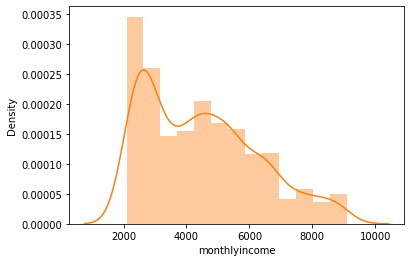

In [210]:
outliers = df['monthlyincome'][(outlier_15_low | outlier_15_up)]
valid_data = df['monthlyincome'][~(outlier_15_low | outlier_15_up)]

sns.distplot(outliers, label='Outliers')
sns.distplot(valid_data, label='Valid Data')

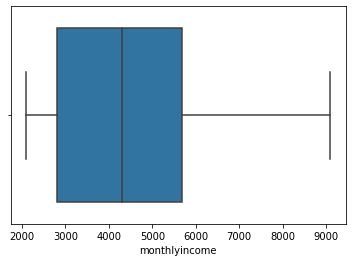

In [211]:
sns.boxplot(x = df['monthlyincome'])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


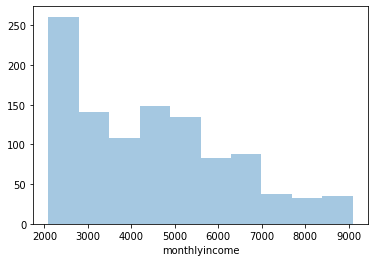

In [212]:
sns.distplot(df['monthlyincome'],bins=10,kde=False)
plt.show()

# Winsorize Method

In [213]:
# Download the dataset from openml
dataset = fetch_openml(data_id=43696, as_frame=True)
#Extract feature matrix X and show 5 random samples
df = dataset["frame"]
pd.set_option("display.max_columns", None)
df.sample(5)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
447,35,No,Travel_Rarely,619,Sales,1,3,Marketing,1,600,2,Male,85,3,2,Sales Executive,3,Married,4717,18659,9,Y,No,11,3,3,80,0,15,2,3,11,9,6,9
488,42,No,Travel_Rarely,622,Research Development,2,4,Life Sciences,1,659,3,Female,81,3,2,Healthcare Representative,4,Married,4089,5718,1,Y,No,13,3,2,80,2,10,4,3,10,2,2,2
61,38,No,Travel_Frequently,653,Research Development,29,5,Life Sciences,1,79,4,Female,50,3,2,Laboratory Technician,4,Single,2406,5456,1,Y,No,11,3,4,80,0,10,2,3,10,3,9,9
1378,42,No,Travel_Rarely,419,Sales,12,4,Marketing,1,1943,2,Male,77,3,2,Sales Executive,4,Divorced,5087,2900,3,Y,Yes,12,3,3,80,2,14,4,3,0,0,0,0
167,30,No,Travel_Rarely,1339,Sales,5,3,Life Sciences,1,228,2,Female,41,3,3,Sales Executive,4,Married,9419,8053,2,Y,No,12,3,3,80,1,12,2,3,10,9,7,4


In [214]:
# Basic Data Cleaning
# Make columns lower case
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C

df.head(1)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,yes,travel_rarely,1102,sales,1,2,life_sciences,1,1,2,female,94,3,2,sales_executive,4,single,5993,19479,8,y,yes,11,3,1,80,0,8,0,1,6,4,0,5


In [215]:
from scipy.stats.mstats import winsorize


In [216]:
df['monthlyincome'].quantile(0.01)

1382.46

In [217]:
df['monthlyincome'].quantile(0.85)

10927.8

In [218]:
# how do we treat outliers with the winsorization method
df_table_win = winsorize(df['monthlyincome'],(0.01,0.15))  # lower boundary 1% - upper boundary 1-0.10 or 90th percentile or higher

In [219]:
df_table_win

masked_array(data=[5993, 5130, 2090, ..., 6142, 5390, 4404],
             mask=False,
       fill_value=999999)

<AxesSubplot:>

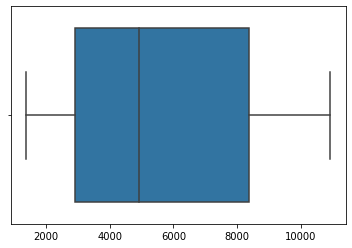

In [220]:
sns.boxplot(x=df_table_win)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

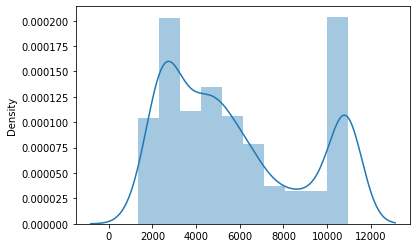

In [221]:
sns.distplot(df_table_win,bins=10,kde=True)

In [222]:
df_table_win = pd.DataFrame(df_table_win)[0]
df_table_win.describe()

count     1470.000000
mean      5742.736054
std       3123.144396
min       1359.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      10932.000000
Name: 0, dtype: float64

# Log Transformations

In [223]:
# Download the dataset from openml
dataset = fetch_openml(data_id=43696, as_frame=True)
#Extract feature matrix X and show 5 random samples
df = dataset["frame"]
pd.set_option("display.max_columns", None)
df.sample(5)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1084,34,No,Travel_Rarely,971,Sales,1,3,Technical Degree,1,1535,4,Male,64,2,3,Sales Executive,3,Married,7083,12288,1,Y,Yes,14,3,4,80,0,10,3,3,10,9,8,6
1061,24,No,Non-Travel,830,Sales,13,2,Life Sciences,1,1495,4,Female,78,3,1,Sales Representative,2,Married,2033,7103,1,Y,No,13,3,3,80,1,1,2,3,1,0,0,0
616,51,No,Travel_Rarely,1318,Sales,26,4,Marketing,1,851,1,Female,66,3,4,Manager,3,Married,16307,5594,2,Y,No,14,3,3,80,1,29,2,2,20,6,4,17
428,47,No,Travel_Rarely,983,Research Development,2,2,Medical,1,574,1,Female,65,3,2,Manufacturing Director,4,Divorced,5070,7389,5,Y,No,13,3,3,80,3,20,2,3,5,0,0,4
334,45,No,Travel_Rarely,549,Research Development,8,4,Other,1,452,4,Male,75,3,2,Research Scientist,4,Married,3697,9278,9,Y,No,14,3,1,80,2,12,3,3,10,9,9,8


In [224]:
# Basic Data Cleaning
# Make columns lower case
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C

df.head(1)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,yes,travel_rarely,1102,sales,1,2,life_sciences,1,1,2,female,94,3,2,sales_executive,4,single,5993,19479,8,y,yes,11,3,1,80,0,8,0,1,6,4,0,5


<AxesSubplot:xlabel='monthlyincome'>

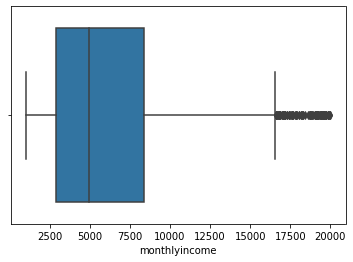

In [225]:
df['monthlyincome'].head()
sns.boxplot(x=df['monthlyincome'])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='monthlyincome'>

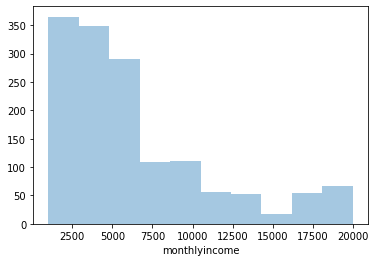

In [226]:
sns.distplot(df['monthlyincome'],bins=10,kde=False)

In [227]:
import numpy as np
df_monthlyincome_log = np.log(df['monthlyincome'])

In [228]:
df['monthlyincome'].head()

0    5993
1    5130
2    2090
3    2909
4    3468
Name: monthlyincome, dtype: int64

In [229]:
df_monthlyincome_log.head()

0    8.698347
1    8.542861
2    7.644919
3    7.975565
4    8.151333
Name: monthlyincome, dtype: float64

<AxesSubplot:xlabel='monthlyincome'>

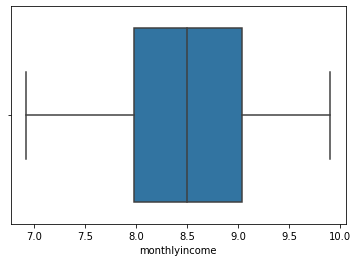

In [230]:
sns.boxplot(x=df_monthlyincome_log)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='monthlyincome'>

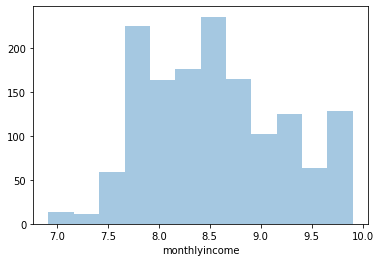

In [231]:
sns.distplot(df_monthlyincome_log,bins=12,kde=False)

# Feature Selection

In this notebook we will develop a Python class for feature detection. The objective is to create a an object that encompasses several different feature selection methods and that can be applied to multiple datasets. This class will implement five different feature selection methods:

1. Remove columns with a missing fraction greater than a specified threshold
2. Remove features with only a single unique value
3. Remove collinear features as idenfitied by a correlation coefficient greater than a specified value
4. Remove features with 0.0 importance from a gradient boosting machine
5. Remove features that do not contribute to a specified cumulative feature importance from the gradient boosting machine

In [368]:
import pandas as pd
import numpy as np

import lightgbm as lgb

from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import seaborn as sns

import gc

from sklearn.exceptions import NotFittedError

from itertools import chain

In [369]:
# Use IBM_AttritionDF_no _outliers.csv after Tukey outlier method
ibm_attr_train_full = pd.read_csv('/content/IBM_AttritionDF_no_outliers.csv')
#ibm_attr_train.sample(5)
ibm_attr_train_labels = ibm_attr_train_full['attrition']
ibm_attr_train = ibm_attr_train_full.drop(columns = 'attrition')
ibm_attr_train.head()
ibm_attr_train_labels.head()










0    yes
1     no
2     no
3     no
4     no
Name: attrition, dtype: object

In [331]:
import pandas as pd
import numpy as np

import lightgbm as lgb

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import gc

from sklearn.exceptions import NotFittedError

from itertools import chain




class FeatureSelector():
    """
    Class for performing feature selection for machine learning or data preprocessing.
    
    Implements five different methods
    
        1. Remove columns with a missing percentage greater than a specified threshold
        2. Remove columns with a single unique value
        3. Remove collinear variables with a correlation greater than a specified correlation coefficient
        4. Remove features with 0.0 feature importance from a gradient boosting machine (gbm)
        5. Remove features that do not contribute to a specified cumulative feature importance from the gbm
        
    Attributes
    --------
    
    record_missing : dataframe
        Records the fraction of missing values for features with missing fraction above threshold
    
    record_single_unique : dataframe
        Records the features that have a single unique value
    
    record_collinear : dataframe
        Records the pairs of collinear variables with a correlation coefficient above the threshold
    
    record_zero_importance : dataframe
        Records the zero importance features in the data according to the gbm
    
    record_low_importance : dataframe
        Records the lowest importance features not needed to reach the threshold of cumulative importance according to the gbm
    
    feature_importances : dataframe
        All the features importances from the gbm
    
    removal_ops : dict
        Dictionary of removal operations and associated features for removal identified
        
    Notes
    --------
    
        - All 5 operations can be run with the `identify_all` method.
        - Calculating the feature importances requires labels (a supervised learning task) 
          for training the gradient boosting machine
        - For the feature importances, the dataframe is first one-hot encoded before training the gbm.
    
    """
    
    def __init__(self):
        
        # Dataframes recording information about features to remove
        self.record_missing = None
        self.record_single_unique = None
        self.record_collinear = None
        self.record_zero_importance = None
        self.record_low_importance = None
        
        self.feature_importances = None
        
        # Dictionary to hold removal operations
        self.removal_ops = {}
        
        
        
    def identify_missing(self, data, missing_threshold):
        """Find the features with a fraction of missing values above `missing_threshold`"""
        
        self.missing_threshold = missing_threshold

        # Calculate the fraction of missing in each column 
        missing_series = data.isnull().sum() / data.shape[0]
        
        self.missing_stats = pd.DataFrame(missing_series).rename(columns = {'index': 'feature', 0: 'missing_fraction'})

        # Find the columns with a missing percentage above the threshold
        record_missing = pd.DataFrame(missing_series[missing_series > missing_threshold]).reset_index().rename(columns = {'index': 'feature', 0: 'missing_fraction'})

        to_drop = list(record_missing['feature'])

        self.record_missing = record_missing
        self.removal_ops['missing'] = to_drop
        
        print('%d features with greater than %0.2f missing values.\n' % (len(self.removal_ops['missing']), self.missing_threshold))
        
    def identify_single_unique(self, data):
        """Identifies features with only a single unique value. NaNs do not count as a unique value. """

        # Calculate the unique counts in each column
        unique_counts = data.nunique()

        self.unique_stats = pd.DataFrame(unique_counts).rename(columns = {'index': 'feature', 0: 'nunique'})
        
        # Find the columns with only one unique count
        record_single_unique = pd.DataFrame(unique_counts[unique_counts == 1]).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})

        to_drop = list(record_single_unique['feature'])
    
        self.record_single_unique = record_single_unique
        self.removal_ops['single_unique'] = to_drop
        
        print('%d features with a single unique value.\n' % len(self.removal_ops['single_unique']))
    
    def identify_collinear(self, data, correlation_threshold):
        """
        Finds collinear features based on the correlation coefficient between features. 
        For each pair of features with a correlation coefficient greather than `correlation_threshold`,
        only one of the pair is identified for removal. 

        Using code adapted from: https://gist.github.com/Swarchal/e29a3a1113403710b6850590641f046c
        
        Parameters
        --------

        data : dataframe
            Data observations in the rows and features in the columns

        correlation_threshold : float between 0 and 1
            Value of the Pearson correlation cofficient for identifying correlation features

        """
        
        self.correlation_threshold = correlation_threshold

        # Calculate the correlations between every column
        corr_matrix = data.corr()
        
        self.corr_matrix = corr_matrix
    
        # Extract the upper triangle of the correlation matrix
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
        
        # Select the features with correlations above the threshold
        # Need to use the absolute value
        to_drop = [column for column in upper.columns if any(upper[column].abs() > correlation_threshold)]

        # Dataframe to hold correlated pairs
        record_collinear = pd.DataFrame(columns = ['drop_feature', 'corr_feature', 'corr_value'])

        # Iterate through the columns to drop
        for column in to_drop:

            # Find the correlated features
            corr_features = list(upper.index[upper[column].abs() > correlation_threshold])

            # Find the correlated values
            corr_values = list(upper[column][upper[column].abs() > correlation_threshold])
            drop_features = [column for _ in range(len(corr_features))]    

            # Record the information (need a temp df for now)
            temp_df = pd.DataFrame.from_dict({'drop_feature': drop_features,
                                             'corr_feature': corr_features,
                                             'corr_value': corr_values})

            # Add to dataframe
            record_collinear = record_collinear.append(temp_df, ignore_index = True)

            
        self.record_collinear = record_collinear
        self.removal_ops['collinear'] = to_drop
        
        print('%d features with a correlation greater than %0.2f.\n' % (len(self.removal_ops['collinear']), self.correlation_threshold))

    def identify_zero_importance(self, features, labels, eval_metric, task='classification', 
                                 n_iterations=10, early_stopping = True):
        """
        
        Identify the features with zero importance according to a gradient boosting machine.
        The gbm can be trained with early stopping using a validation set to prevent overfitting. 
        The feature importances are averaged over n_iterations to reduce variance. 
        
        Uses the LightGBM implementation (http://lightgbm.readthedocs.io/en/latest/index.html)

        Parameters 
        --------
        features : dataframe
            Data for training the model with observations in the rows
            and features in the columns

        labels : array, shape = (1, )
            Array of labels for training the model. These can be either binary 
            (if task is 'classification') or continuous (if task is 'regression')

        eval_metric : string
            Evaluation metric to use for the gradient boosting machine

        task : string, default = 'classification'
            The machine learning task, either 'classification' or 'regression'

        n_iterations : int, default = 10
            Number of iterations to train the gradient boosting machine
            
        early_stopping : boolean, default = True
            Whether or not to use early stopping with a validation set when training
        
        
        Notes
        --------
        
        - Features are one-hot encoded to handle the categorical variables before training.
        - The gbm is not optimized for any particular task and might need some hyperparameter tuning
        - Feature importances, including zero importance features, can change across runs

        """

        # One hot encoding
        features = pd.get_dummies(features)

        # Extract feature names
        feature_names = list(features.columns)

        # Convert to np array
        features = np.array(features)
        labels = np.array(labels).reshape((-1, ))

        # Empty array for feature importances
        feature_importance_values = np.zeros(len(feature_names))
        
        print('Training Gradient Boosting Model\n')
        
        # Iterate through each fold
        for _ in range(n_iterations):

            if task == 'classification':
                model = lgb.LGBMClassifier(n_estimators=1000, learning_rate = 0.05, verbose = -1)

            elif task == 'regression':
                model = lgb.LGBMRegressor(n_estimators=1000, learning_rate = 0.05, verbose = -1)

            else:
                raise ValueError('Task must be either "classification" or "regression"')
                
            # If training using early stopping need a validation set
            if early_stopping:
                
                train_features, valid_features, train_labels, valid_labels = train_test_split(features, labels, test_size = 0.15)

                # Train the model with early stopping
                model.fit(train_features, train_labels, eval_metric = eval_metric,
                          eval_set = [(valid_features, valid_labels)],
                          early_stopping_rounds = 100, verbose = -1)
                
                # Clean up memory
                gc.enable()
                del train_features, train_labels, valid_features, valid_labels
                gc.collect()
                
            else:
                model.fit(features, labels)

            # Record the feature importances
            feature_importance_values += model.feature_importances_ / n_iterations

        feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

        # Sort features according to importance
        feature_importances = feature_importances.sort_values('importance', ascending = False).reset_index(drop = True)

        # Normalize the feature importances to add up to one
        feature_importances['normalized_importance'] = feature_importances['importance'] / feature_importances['importance'].sum()
        feature_importances['cumulative_importance'] = np.cumsum(feature_importances['normalized_importance'])

        # Extract the features with zero importance
        record_zero_importance = feature_importances[feature_importances['importance'] == 0.0]
        
        to_drop = list(record_zero_importance['feature'])

        self.feature_importances = feature_importances
        self.record_zero_importance = record_zero_importance
        self.removal_ops['zero_importance'] = to_drop
        
        print('\n%d features with zero importance.\n' % len(self.removal_ops['zero_importance']))
    
    def identify_low_importance(self, cumulative_importance):
        """
        Finds the lowest importance features not needed to account for `cumulative_importance` 
        of the feature importance from the gradient boosting machine. As an example, if cumulative
        importance is set to 0.95, this will retain only the most important features needed to 
        reach 95% of the total feature importance. The identified features are those not needed.

        Parameters
        --------
        cumulative_importance : float between 0 and 1
            The fraction of cumulative importance to account for 

        """

        self.cumulative_importance = cumulative_importance
        
        # The feature importances need to be calculated before running
        if self.feature_importances is None:
            raise NotFittedError('Feature importances have not yet been determined. Call the `identify_zero_importance` method` first.')
            
        # Make sure most important features are on top
        self.feature_importances = self.feature_importances.sort_values('cumulative_importance')

        # Identify the features not needed to reach the cumulative_importance
        record_low_importance = self.feature_importances[self.feature_importances['cumulative_importance'] > cumulative_importance]

        to_drop = list(record_low_importance['feature'])

        self.record_low_importance = record_low_importance
        self.removal_ops['low_importance'] = to_drop
    
        print('%d features that do not contribute to cumulative importance of %0.2f.\n' % (len(self.removal_ops['low_importance']), self.cumulative_importance))
        
    def identify_all(self, features, labels, selection_params):
        """
        Use all five of the methods to identify features to remove.
        
        Parameters
        --------
        
        features : dataframe
            Data for training the model with observations in the rows
            and features in the columns

        labels : array, shape = (1, )
            Array of labels for training the model. These can be either binary 
            (if task is 'classification') or continuous (if task is 'regression')
            
        selection_params : dict
           Parameters to use in the five feature selection methhods.
           Params must contain the keys ['missing_threshold', 'correlation_threshold', 'eval_metric', 'task', 'cumulative_importance']
        
        """
        
        # Check for all required parameters
        for param in ['missing_threshold', 'correlation_threshold', 'eval_metric', 'task', 'cumulative_importance']:
            if param not in selection_params.keys():
                raise ValueError('%s is a required parameter for this method' % param)
        
        # Implement each of the five methods
        self.identify_missing(features, selection_params['missing_threshold'])
        self.identify_single_unique(features)
        self.identify_collinear(features, selection_params['correlation_threshold'])
        self.identify_zero_importance(features, labels, selection_params['eval_metric'], selection_params['task'])
        self.identify_low_importance(selection_params['cumulative_importance'])
        
        # Find the number of features identified to drop
        self.n_identified = len(set(list(chain(*list(self.removal_ops.values())))))
        print('%d total features out of %d identified for removal.\n' % (self.n_identified, pd.get_dummies(features).shape[1]))
        
    def check_identified(self):
        """Check the identified features before removal. Returns a set of the unique features identified."""
        
        all_identified = set(list(chain(*list(self.removal_ops.values()))))
        print('%d features identified for removal' % len(all_identified))
        
        return all_identified
        
    
    def remove(self, data, methods):
        """
        Remove the features from the data according to the specified methods.
        
        Parameters
        --------
            data : dataframe
                Dataframe with features to remove
            methods : 'all' or list of methods
                If methods == 'all', any methods that have identified features will be used
                Otherwise, only the specified methods will be used.
                Can be one of ['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance']
                
        Return
        --------
            data : dataframe
                Dataframe with identified features removed
                
        
        Notes 
        --------
            - This first one-hot encodes the categorical variables in accordance with the gradient boosting machine.
            - Check the features that will be removed before transforming data!
        
        """
        
        
        features_to_drop = []
        
        data = pd.get_dummies(data)
        
        if methods == 'all':
            
            print('{} methods have been run'.format(list(self.removal_ops.keys())))
            
            # Find the unique features to drop
            features_to_drop = set(list(chain(*list(self.removal_ops.values()))))
            
        else:
            # Iterate through the specified methods
            for method in methods:
                # Check to make sure the method has been run
                if method not in self.removal_ops.keys():
                    raise NotFittedError('%s method has not been run' % method)
                    
                # Append the features identified for removal
                else:
                    features_to_drop.append(self.removal_ops[method])
        
            # Find the unique features to drop
            features_to_drop = set(list(chain(*features_to_drop)))
            
        # Remove the features and return the data
        data = data.drop(columns = features_to_drop)
        self.removed_features = features_to_drop
        
        print('Removed %d features' % len(features_to_drop))
        return data
    
    def plot_missing2(self):
        """Histogram of missing fraction in each feature"""
        if self.record_missing is None:
            raise NotImplementedError("Missing values have not been calculated. Run `identify_missing`")
        
        self.reset_plot()
        self.missing_stats.plot.hist(color = 'red', edgecolor = 'k', figsize = (6, 4), fontsize = 14)
        plt.ylabel('Frequency', size = 18)
        plt.xlabel('Missing Fraction', size = 18); plt.title('Missing Fraction Histogram', size = 18);

    def plot_missing(self, threshold=0.0):
        """Histogram of missing fraction in each feature and print columns with missing values above threshold"""
        if self.record_missing is None:
            raise NotImplementedError("Missing values have not been calculated. Run `identify_missing`")
    
        # Extract the column names with missing fraction above threshold
        cols_above_threshold = self.missing_stats[self.missing_stats['missing_fraction'] > threshold].index.tolist()
        print(f"Columns with missing fraction above {threshold:.2f}: {cols_above_threshold}")
    
        # Plot the missing fraction histogram
        self.reset_plot()
        self.missing_stats.plot.bar(y='missing_fraction', color='red', edgecolor='k', figsize=(len(self.missing_stats), 4), fontsize=14)
        plt.xticks(rotation=90)
        plt.ylabel('Missing Fraction', size=18)
        plt.xlabel('Feature', size=18)
        plt.title('Missing Fraction Histogram', size=18);

    
    def plot_unique(self):
        """Histogram of number of unique values in each feature"""
        if self.record_single_unique is None:
            raise NotImplementedError('Unique values have not been calculated. Run `identify_single_unique`')
        
        self.reset_plot()
        self.unique_stats.plot.hist(edgecolor = 'k', figsize = (6, 4), fontsize = 14)
        plt.ylabel('Frequency', size = 18)
        plt.xlabel('Unique Values', size = 18); plt.title('Unique Values Histogram', size = 18);
        
    
    def plot_collinear(self):
        """
        Heatmap of the features with correlations above the correlated threshold in the data.
        
        Notes
        --------
            - Not all of the plotted correlations are above the threshold because this plots
            all the variables that have been idenfitied as having even one correlation above the threshold
            - The features on the x-axis are those that will be removed. The features on the y-axis
            are the correlated feature with those on the x-axis
        
        """
        
        if self.record_collinear is None:
            raise NotImplementedError('Collinear features have not been idenfitied. Run `identify_collinear`.')
        
        # Identify the correlations that were above the threshold
        corr_matrix_plot = self.corr_matrix.loc[list(set(self.record_collinear['corr_feature'])), 
                                                list(set(self.record_collinear['drop_feature']))]

        # Set up the matplotlib figure
        f, ax = plt.subplots(figsize=(10, 8))

        # Generate a custom diverging colormap
        cmap = sns.diverging_palette(220, 10, as_cmap=True)

        # Draw the heatmap with the mask and correct aspect ratio
        sns.heatmap(corr_matrix_plot, cmap=cmap, center=0,
                    linewidths=.25, cbar_kws={"shrink": 0.6})

        ax.set_yticks([x + 0.5 for x in list(range(corr_matrix_plot.shape[0]))])
        ax.set_yticklabels(list(corr_matrix_plot.index), size = int(160 / corr_matrix_plot.shape[0]));

        ax.set_xticks([x + 0.5 for x in list(range(corr_matrix_plot.shape[1]))])
        ax.set_xticklabels(list(corr_matrix_plot.columns), size = int(160 / corr_matrix_plot.shape[1]));
        
        plt.xlabel('Features to Remove', size = 8); plt.ylabel('Correlated Feature', size = 8)
        plt.title("Correlations Above Threshold", size = 14)
        
    def plot_feature_importances(self, threshold = None):
        """
        Plots 15 most important features and the cumulative importance of features.
        If `threshold` is provided, prints the number of features needed to reach `threshold` cumulative importance.

        Parameters
        --------
        threshold : float, between 0 and 1 default = None
            Threshold for printing information about cumulative importances

        """
        
        if self.record_zero_importance is None:
            raise NotImplementedError('Feature importances have not been determined. Run `idenfity_zero_importance`')

        self.reset_plot()
        
        # Make a horizontal bar chart of feature importances
        plt.figure(figsize = (10, 6))
        ax = plt.subplot()

        # Need to reverse the index to plot most important on top
        ax.barh(list(reversed(list(self.feature_importances.index[:15]))), 
                self.feature_importances['normalized_importance'].head(15), 
                align = 'center', edgecolor = 'k')

        # Set the yticks and labels
        ax.set_yticks(list(reversed(list(self.feature_importances.index[:15]))))
        ax.set_yticklabels(self.feature_importances['feature'].head(15), size = 12)

        # Plot labeling
        plt.xlabel('Normalized Importance', size = 16); plt.title('Feature Importances', size = 18)
        plt.show()

        # Cumulative importance plot
        plt.figure(figsize = (6, 4))
        plt.plot(list(range(1, len(self.feature_importances) + 1)), self.feature_importances['cumulative_importance'], 'r-')
        plt.xlabel('Number of Features', size = 14); plt.ylabel('Cumulative Importance', size = 14); 
        plt.title('Cumulative Feature Importance', size = 16);

        if threshold:

            # Index of minimum number of features needed for cumulative importance threshold
            importance_index = np.min(np.where(self.feature_importances['cumulative_importance'] > threshold))
            plt.vlines(x = importance_index + 1, ymin = 0, ymax = 1, linestyles='--', colors = 'blue')
            plt.show()

            print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))

        
    def reset_plot(self):
        plt.rcParams = plt.rcParamsDefault

In [332]:
fs = FeatureSelector()

In [333]:
fs.identify_missing(ibm_attr_train,0.80)
# fs.plot_missing()

0 features with greater than 0.80 missing values.



In [334]:
fs.identify_single_unique(ibm_attr_train)

3 features with a single unique value.



<ipython-input-331-7dbf7bbe8130>:147: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))


1 features with a correlation greater than 0.99.



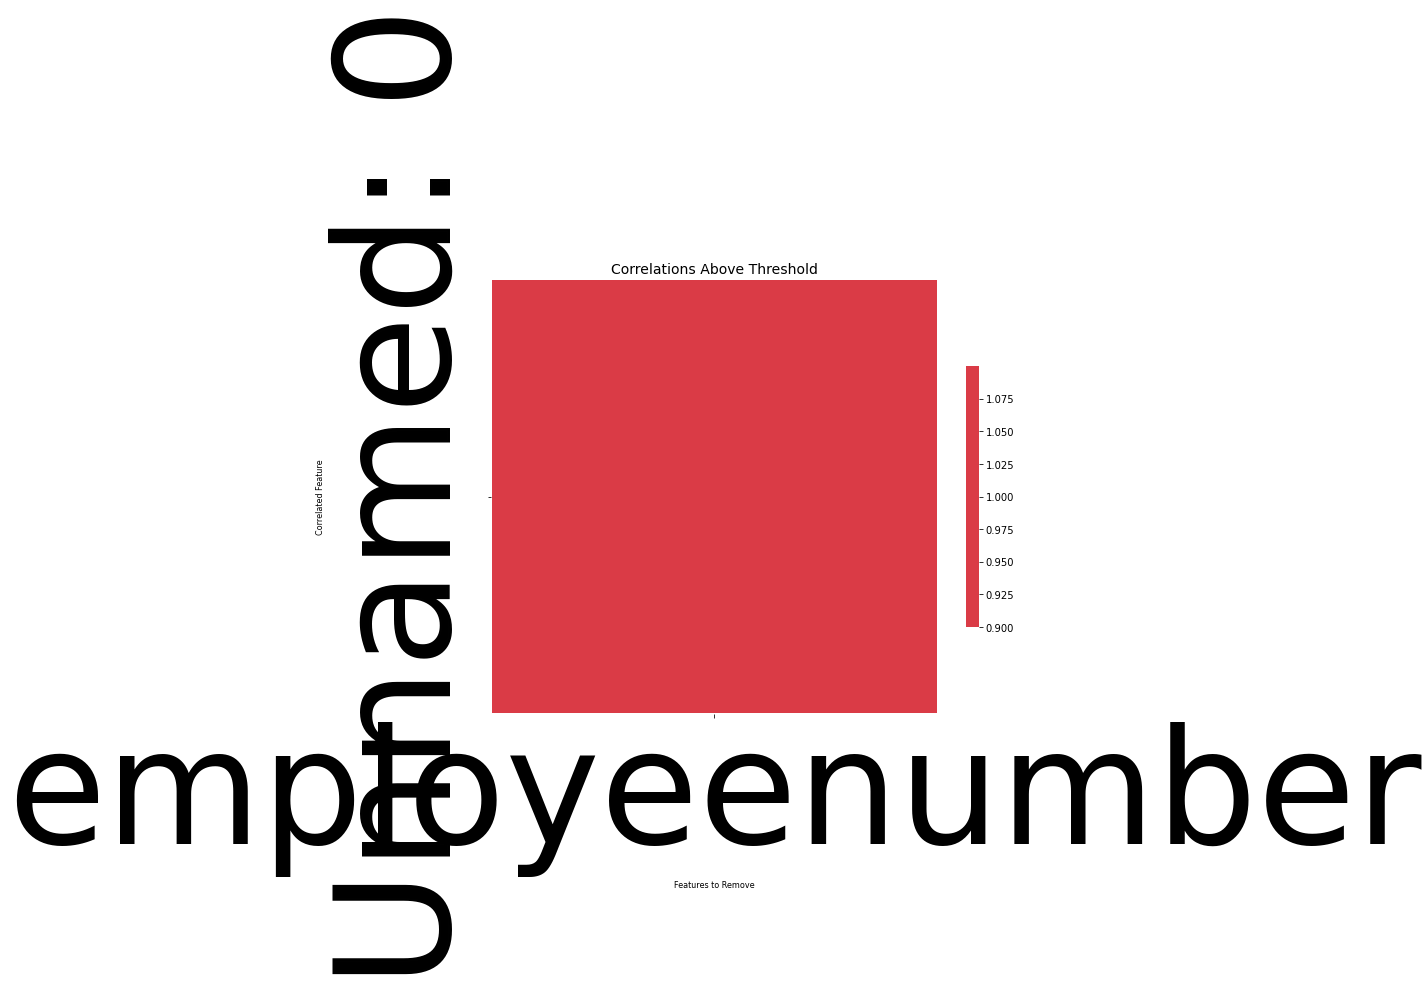

In [335]:
fs.identify_collinear(ibm_attr_train, 0.99)
fs.plot_collinear()

<ipython-input-331-7dbf7bbe8130>:147: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))


8 features with a correlation greater than 0.50.



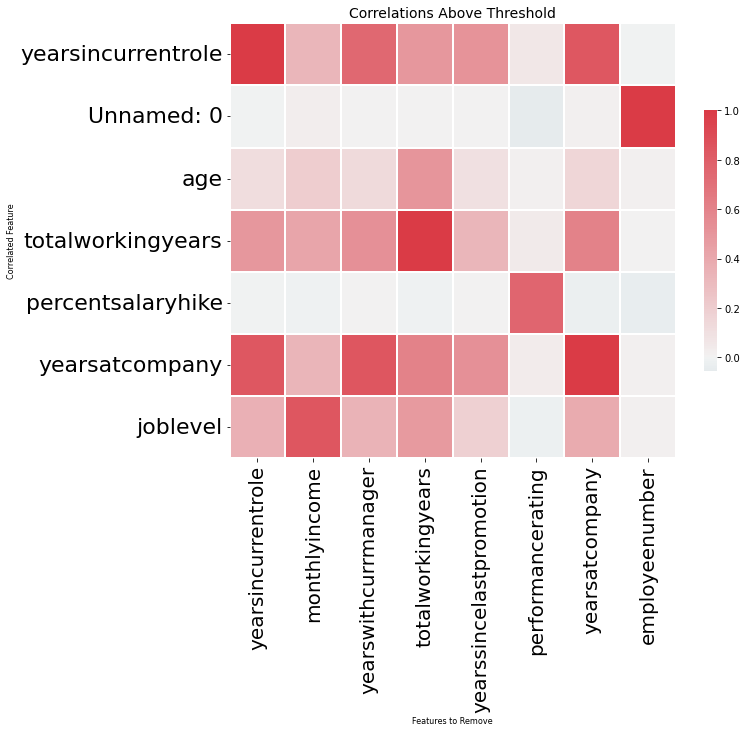

In [336]:
fs.identify_collinear(ibm_attr_train, 0.50)
fs.plot_collinear()

In [337]:
fs.identify_zero_importance(ibm_attr_train, ibm_attr_train_labels, eval_metric='auc')

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[13]	valid_0's auc: 0.82283	valid_0's binary_logloss: 0.383681
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[64]	valid_0's auc: 0.784706	valid_0's binary_logloss: 0.358959
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[4]	valid_0's auc: 0.768589	valid_0's binary_logloss: 0.392429
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[36]	valid_0's auc: 0.709248	valid_0's binary_logloss: 0.441172
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[47]	valid_0's auc: 0.871176	valid_0's binary_logloss: 0.307592
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[74]	valid_0's auc: 0.831364	valid_0's binary_logloss: 0.367

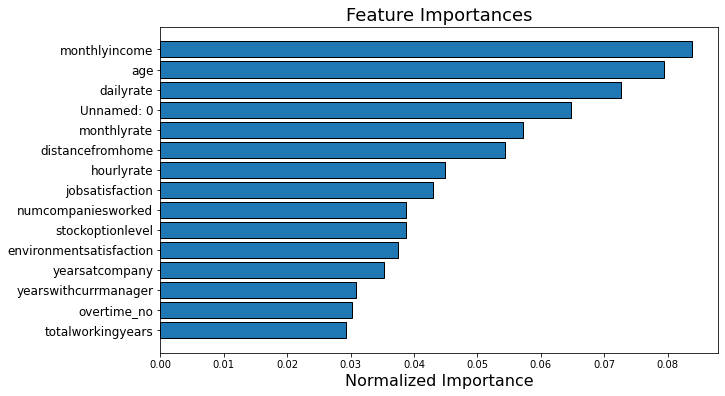

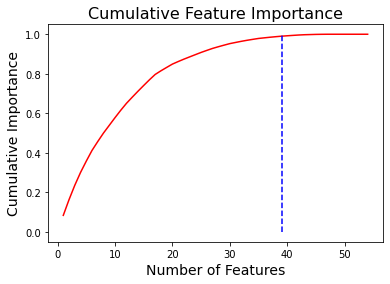

39 features required for 0.99 of cumulative importance


In [338]:
fs.plot_feature_importances(threshold = 0.99)

In [339]:
fs.identify_all(ibm_attr_train, ibm_attr_train_labels, {'missing_threshold': 0.8, 'correlation_threshold': 0.95, 'eval_metric': 'auc','task': 'classification', 'cumulative_importance': 0.95})

0 features with greater than 0.80 missing values.

3 features with a single unique value.

1 features with a correlation greater than 0.95.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.


<ipython-input-331-7dbf7bbe8130>:147: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))


Early stopping, best iteration is:
[43]	valid_0's auc: 0.752926	valid_0's binary_logloss: 0.406985
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[55]	valid_0's auc: 0.822353	valid_0's binary_logloss: 0.342453
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[35]	valid_0's auc: 0.843824	valid_0's binary_logloss: 0.335167
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[80]	valid_0's auc: 0.82304	valid_0's binary_logloss: 0.372892
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[25]	valid_0's auc: 0.720798	valid_0's binary_logloss: 0.397386
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[60]	valid_0's auc: 0.745585	valid_0's binary_logloss: 0.369179
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteratio

In [340]:
features_identified = fs.check_identified()

26 features identified for removal


In [341]:
list(features_identified)

['maritalstatus_divorced',
 'overtime_yes',
 'educationfield_human_resources',
 'gender_female',
 'jobrole_human_resources',
 'educationfield_marketing',
 'department_sales',
 'jobrole_sales_representative',
 'businesstravel_travel_rarely',
 'over18_y',
 'educationfield_medical',
 'gender_male',
 'jobrole_healthcare_representative',
 'department_research__development',
 'employeecount',
 'educationfield_other',
 'performancerating',
 'educationfield_technical_degree',
 'employeenumber',
 'maritalstatus_married',
 'department_human_resources',
 'standardhours',
 'businesstravel_non-travel',
 'jobrole_manufacturing_director',
 'jobrole_sales_executive',
 'over18']

In [357]:
# The Categorical columns have been converted with values similar to SkLearn's Dictionary Vectorizer
####ibm_attr_train_removed = fs.remove(ibm_attr_train, methods = 'all')


In [392]:
#
# Prepare Model Harness
#
# Split the data into test, train, validation sets... 80/20
from sklearn.model_selection import train_test_split
# This gives the 80/20 train test split
df_train_full, df_test = train_test_split(ibm_attr_train_full, test_size=0.50, random_state=11)

len(df_train_full), len(df_test)
# Replace nulls with 0's - these are pandas dataframes
df_train_full = df_train_full.fillna(0)

df_test = df_test.fillna(0)
len(df_train_full),len(df_test)

(535, 535)

In [393]:
#Split the y out into train/test/splits... these are numpy ndarrays ... msrp is your target variables
# Replace with your target variable!!!  
y_train = (df_train_full.attrition).values
y_test = (df_test.attrition).values
del df_train_full['attrition']
del df_test['attrition']

In [394]:
# Convert these data frames into a LIST of DICTIONARIES (each element in the list is a dictionary (the record))
# IF YOU HAVE CAT values... we need to encode them... pandas get dummies OR dictionary vectorizor OR several other examples... allow us to encode
# this example will work with ANY cat data.

dict_train = df_train_full.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')

In [395]:
# Convert the LIST OF DICTIONARIES into a Feature Matrix (does all of the encoding)
from sklearn.feature_extraction import DictVectorizer
 
dv = DictVectorizer(sparse=False)
 
X_train = dv.fit_transform(dict_train)
X_test = dv.transform(dict_test)
features = dv.feature_names_  #Features as they exist in the Vectorized Dictionary (this is an ndarray)
features

['Unnamed: 0',
 'age',
 'businesstravel=non-travel',
 'businesstravel=travel_frequently',
 'businesstravel=travel_rarely',
 'dailyrate',
 'department=human_resources',
 'department=research__development',
 'department=sales',
 'distancefromhome',
 'education',
 'educationfield=human_resources',
 'educationfield=life_sciences',
 'educationfield=marketing',
 'educationfield=medical',
 'educationfield=other',
 'educationfield=technical_degree',
 'employeecount',
 'employeenumber',
 'environmentsatisfaction',
 'gender=female',
 'gender=male',
 'hourlyrate',
 'jobinvolvement',
 'joblevel',
 'jobrole=healthcare_representative',
 'jobrole=human_resources',
 'jobrole=laboratory_technician',
 'jobrole=manufacturing_director',
 'jobrole=research_scientist',
 'jobrole=sales_executive',
 'jobrole=sales_representative',
 'jobsatisfaction',
 'maritalstatus=divorced',
 'maritalstatus=married',
 'maritalstatus=single',
 'monthlyincome',
 'monthlyrate',
 'numcompaniesworked',
 'over18=y',
 'overtime=no

LR: 0.865304 (0.027866)
Score for each of the 10 K-fold tests:  [0.81481481 0.88888889 0.90740741 0.88888889 0.88888889 0.86792453
 0.86792453 0.8490566  0.83018868 0.8490566 ]
LogisticRegression(solver='liblinear')
	Training time: 0.020s
	Prediction time: 0.202s

LDA: 0.865339 (0.038245)
Score for each of the 10 K-fold tests:  [0.87037037 0.7962963  0.92592593 0.87037037 0.90740741 0.86792453
 0.90566038 0.83018868 0.83018868 0.8490566 ]
LinearDiscriminantAnalysis()
	Training time: 0.016s
	Prediction time: 0.162s

KNN: 0.770161 (0.048821)
Score for each of the 10 K-fold tests:  [0.75925926 0.77777778 0.77777778 0.75925926 0.74074074 0.86792453
 0.79245283 0.79245283 0.66037736 0.77358491]
KNeighborsClassifier()
	Training time: 0.002s
	Prediction time: 0.136s

CART: 0.811321 (0.044154)
Score for each of the 10 K-fold tests:  [0.74074074 0.77777778 0.85185185 0.83333333 0.7962963  0.88679245
 0.86792453 0.77358491 0.79245283 0.79245283]
DecisionTreeClassifier(max_depth=4, min_samples_le

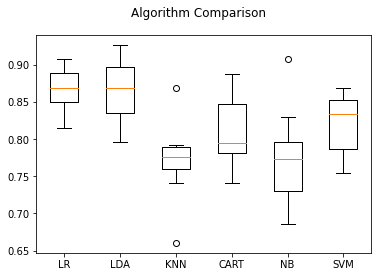

In [396]:
# Compare Algorithms with the Algorithm Harness
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
from sklearn.metrics import roc_auc_score
from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
#### Update parameters to the Decision Tree
models.append(('CART', DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=42)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
# scoring = 'roc_auc'
scoring = 'accuracy'
# you can also use other metrics to score your models: https://iqcode.com/code/python/sklearn-cross-val-score-scoring-options
for name, model in models:
    start = time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_train, y_train)
    train_time = time() - start
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    predict_time = time()-start 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #y_pred = model.predict_proba(X_train)[:, 1]
    #auc = roc_auc_score(y_train, y_pred)
    print(msg)
    print("Score for each of the 10 K-fold tests: ",cv_results)
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    #y_pred = model.predict(X_test)
    #print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print()
    
    
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [397]:
# once you have identified a couple of models... being to drill down and tweak it
# %%timeit -n 1
# if you uncomment %%timeit it will not put lr into memory
# Let's assume that the decision tree is the one we want to explore
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)  # in this step here... you are training the data to the model... ie:  fitting the data to the model

DecisionTreeClassifier()

In [398]:
dt.get_params()



{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [399]:
# You have converted the dataframe into a list of dictionaries - validate the headers
type(X_train)
type(dv.feature_names_)
type(dt.feature_importances_)
dv.feature_names_

['Unnamed: 0',
 'age',
 'businesstravel=non-travel',
 'businesstravel=travel_frequently',
 'businesstravel=travel_rarely',
 'dailyrate',
 'department=human_resources',
 'department=research__development',
 'department=sales',
 'distancefromhome',
 'education',
 'educationfield=human_resources',
 'educationfield=life_sciences',
 'educationfield=marketing',
 'educationfield=medical',
 'educationfield=other',
 'educationfield=technical_degree',
 'employeecount',
 'employeenumber',
 'environmentsatisfaction',
 'gender=female',
 'gender=male',
 'hourlyrate',
 'jobinvolvement',
 'joblevel',
 'jobrole=healthcare_representative',
 'jobrole=human_resources',
 'jobrole=laboratory_technician',
 'jobrole=manufacturing_director',
 'jobrole=research_scientist',
 'jobrole=sales_executive',
 'jobrole=sales_representative',
 'jobsatisfaction',
 'maritalstatus=divorced',
 'maritalstatus=married',
 'maritalstatus=single',
 'monthlyincome',
 'monthlyrate',
 'numcompaniesworked',
 'over18=y',
 'overtime=no

In [400]:
def get_properties(model):   
  return [i for i in model.__dict__ if i.endswith('_')] 
get_properties(dt)

['n_features_in_',
 'n_outputs_',
 'classes_',
 'n_classes_',
 'max_features_',
 'tree_']

In [401]:
#Very important.  Once you have a trained model - interegate the coefficients to see WHAT is important
feature_names=dv.feature_names_
# Evaluate the coefficients to learn what the model thinks is important in the predictions.
for i,j in zip(feature_names, dt.feature_importances_): print('%.3f' % j, i)

0.019 Unnamed: 0
0.032 age
0.000 businesstravel=non-travel
0.000 businesstravel=travel_frequently
0.000 businesstravel=travel_rarely
0.061 dailyrate
0.000 department=human_resources
0.000 department=research__development
0.000 department=sales
0.058 distancefromhome
0.023 education
0.000 educationfield=human_resources
0.009 educationfield=life_sciences
0.000 educationfield=marketing
0.000 educationfield=medical
0.000 educationfield=other
0.000 educationfield=technical_degree
0.000 employeecount
0.019 employeenumber
0.036 environmentsatisfaction
0.010 gender=female
0.010 gender=male
0.130 hourlyrate
0.049 jobinvolvement
0.000 joblevel
0.000 jobrole=healthcare_representative
0.000 jobrole=human_resources
0.009 jobrole=laboratory_technician
0.000 jobrole=manufacturing_director
0.011 jobrole=research_scientist
0.000 jobrole=sales_executive
0.000 jobrole=sales_representative
0.053 jobsatisfaction
0.000 maritalstatus=divorced
0.000 maritalstatus=married
0.000 maritalstatus=single
0.111 month

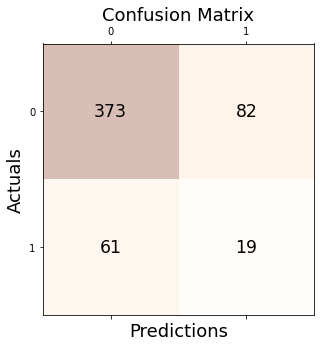

In [402]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
# predict_proba predicts the probability and predict just predicts the category
# y_pred = dt.predict_proba(X_test)[:, 1]
y_pred = dt.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [403]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.86      0.82      0.84       455
         yes       0.19      0.24      0.21        80

    accuracy                           0.73       535
   macro avg       0.52      0.53      0.52       535
weighted avg       0.76      0.73      0.75       535

